
<h1><b>Statistique en Bioinformatique : </b> TME1 </h1>
<br>
L’objectif de ce TME est l’analyse statistique d’une famille de protéines à travers son alignement de séquences:
<br>
<ul>
<li> objectif 1: détection des positions conservées, </li>
<li> objectif 2: détection de séquences qui appartiennent à la même famille, </li>
</ul>
<vr>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**Soumission**</p>
<ul>
<li>Renomer le fichier TME1.ipynb pour TME1_NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Soumettre à https://www.dropbox.com/request/ZylCDDpggbrN5toTiJKV </li>
</ul>
</div>

Nom etudiant 1 : paul saighi
<br>
Nom etudiant 2 : rémy vanderhaegen
<br>

<b>DONNÉES</b> <br>
Il y a 2 fichiers avec les données telecharché à (<a href="http://www.lcqb.upmc.fr/julianab/teaching/SBAS/TME1.tar.gz"> TME1 </a> ): <br>
<ul>
<li> Dtrain.txt: C’est un alignement de M = 5643 protéines d’une seule famille en format FASTA,
<br>
    Lignes qui commencent avec “>” contiennent des commentaires (nome de la protéine etc.). Elles n’ont aucune importance pour notre projet. Les autres lignes contiennent les séquences, que l’on va utiliser dans le projet. Les séquences sont alignées, elles ont toutes la même longueur (L = 48 positions dans notre fichier). Chaque position i = 0, ..., L − 1 d'une séquence contient ou une acide aminé (A,C,...,Y, il y en a 20) ou un trou (–), que l'on considère comme 21ème lettre. Ensemble elles forment l'alphabet: 
    A =  {A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W, Y, -}, avec q = 21 lettres différentes.
</li>
    <br>
<li> testseq.txt:  testseq.txt: Même format de Dtrain.txt, mais avec une seule séquence b = (b0 , ..., bN −1 ) plus longue (longueur N = 114 > L). On va scanner cette séquence pour trouver une sous-séquence qui appartient à la famille definie par Dtrain.txt. </li>
</ul>

Exercise 1: Pour chaque position du alignement i = 0, ..., L − 1 et chaque acide aminée a ∈ A (le trou compris), calculer le nombre d’occurence ni(a) et le poid ωi(a), òu : <br>
\begin{equation*}
\label{eq1}
n_{i}(a) = \textrm{nombre d’occurences d’acide aminée a en position (colonne) i}.
\end{equation*}

<br>
\begin{equation*}
\omega_i(a) = \frac{n_i(a)+1}{M+q}\ .
\end{equation*}

In [2]:
import sys
import numpy as np

aa = [
    "A",
    "C",
    "D",
    "E",
    "F",
    "G",
    "H",
    "I",
    "K",
    "L",
    "M",
    "N",
    "P",
    "Q",
    "R",
    "S",
    "T",
    "V",
    "W",
    "Y",
    "-",
]
q = 21
# aa = ['A', 'B', 'C', '-']
# q = 4
# aa = ['A', 'G', 'C', 'T', '-']
# q = 5

In [3]:
# load path Files
input_dataset_f = "Dtrain.txt"
input_sequence_f = "test_seq.txt"
# input_dataset_f = 'DtrainToy.txt'
# input_sequence_f = 'test_seqToy.txt'
# input_dataset_f = 'DtrainToyTD.txt'

In [4]:
# load DTrain File
def parse(inputs):
    file = open(inputs, "r")
    l = True
    sequences = []
    while l:
        l = file.readline()
        if len(l) > 1 and l[0] != ">":
            sequences.append(l[:-1])
    file.close()
    return sequences


sequences = parse(input_dataset_f)

In [5]:
def weight(q, sequences):
    A = np.ones((q, len(sequences[0])))
    divise = q + len(sequences)
    for i in range(len(sequences)):
        for j in range(len(sequences[i])):
            A[aa.index(sequences[i][j]), j] += 1

    return A / divise

In [25]:
A = weight(q, sequences)
A

array([[1.76553672e-04, 7.25282486e-01, 1.02401130e-02, ...,
        3.42514124e-02, 1.76553672e-04, 2.38170904e-01],
       [1.76553672e-04, 1.76553672e-04, 1.94209040e-03, ...,
        7.59180791e-03, 1.76553672e-04, 1.69491525e-02],
       [1.76553672e-04, 1.76553672e-04, 3.53107345e-04, ...,
        1.76553672e-04, 1.76553672e-04, 1.76553672e-04],
       ...,
       [1.76553672e-04, 1.76553672e-04, 1.76553672e-04, ...,
        1.76553672e-04, 1.76553672e-04, 1.76553672e-04],
       [1.76553672e-04, 1.76553672e-04, 1.76553672e-04, ...,
        1.78319209e-02, 1.76553672e-04, 1.76553672e-04],
       [3.13206215e-01, 1.55367232e-01, 8.20974576e-02, ...,
        5.66737288e-02, 6.77966102e-02, 3.53460452e-01]])

Exercise 2: Trouvez les positions les plus conservées en utilisant l’entropie relative.
<br>
2.1) Pour chaque position i = 0, ..., L − 1, determiner l’entropie relative Si<br>
\begin{equation*}
\label{eq:entropie}
S_i = \log_2(q) + \sum_{a\in {\cal A}} \omega_i(a)\cdot \log_2\left[\omega_i(a) \right]\ .
\end{equation*}
<br>


In [7]:
# Computing Si
Si = []
for i in range(len(sequences[0])):
    s = 0
    for j in range(q):
        s += A[j, i] * np.log2(A[j, i])
    Si.append(np.log2(q) + s)

2.2) Indiquez les acides aminees (ai*) des trois positions les plus conservées : 
\begin{equation}
\label{eq:conserved}
a_i^\star = {\rm argmax}_{a\in {\cal A}} \omega_i(a)\ .
\end{equation}

In [24]:
#computing ai*
Scopy= Si.copy()
inds = []
for i in range(3):
    ind = np.argmax(np.abs([i-0.5 for i in Scopy]))
    inds.append(ind)
    Scopy.pop(ind)
acides = []

for i in inds:
    acides.append(aa[np.argmax(A[:,i])])
    
print(inds,acides)

[31, 45, 42] ['W', 'F', 'T']


2.3) Tracer l’entropie rélative en fonction de chaque position i.

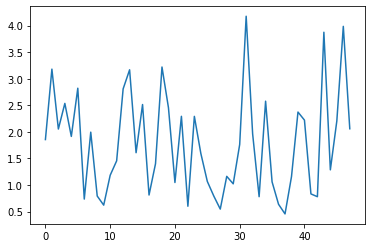

In [9]:
import matplotlib.pyplot as plt

plt.plot(Si)

Exercise 3: Déterminer les paramètres f(0)(b) du modèle nul, où
\begin{equation}
f^{(0)}(b) = \frac 1L \sum_{i=0}^{L-1} \omega_i(b)\ ,
\end{equation}

In [10]:
# computing f0
lF0 = []
i, L = A.shape
for x in range(i):
    lF0.append((A[x].sum()) / L)
lF0

[0.0588070856873823,
 0.007510887476459511,
 0.08008915960451977,
 0.0849149599811676,
 0.041942531779661014,
 0.0904800788606403,
 0.012682438794726929,
 0.050490672080979286,
 0.05113803554613936,
 0.07445047669491525,
 0.01191369467984934,
 0.03564545080037665,
 0.03793329213747646,
 0.034310263653484,
 0.045061646657250466,
 0.048438235640301315,
 0.040725047080979286,
 0.059160193032015064,
 0.0365981049905838,
 0.0385549081920904,
 0.059152836629001886]

Exercise 4: (à appliquer à testseq.txt): Déterminer l(bi,...,bi+L−1)  pour chaque sous-séquence de longueur L. 
Déterminer si il y a des sous-séquences de la famille definie par Dtrain. 
Tracer la log-vraisemblance en fonction de sa première position i = 0, ..., N − L.
\begin{equation}
\label{eq:ll}
\ell(b_0,...,b_{L-1}) = \log_2 \frac {P(b_0,...,b_{L-1} | \omega )
}{P^{(0)}(b_0,...,b_{L-1})}
= \sum_{i=0}^{L-1} \log_2 \frac {\omega_i(b_i)}{f^{(0)}(b_i)}\ .
\end{equation}

4.1: Faites une fonction pour calculer la log-vraisemblance, d'une sequence de taille L.

In [11]:
# computing loglikehood


def loglikehood(sequence, lF0, pwm):
    s = 0
    for i in range(len(sequence)):
        b = aa.index(sequence[i])
        s += np.log2((pwm[b][i]) / lF0[b])
    return s

4.2: Faites une fonction qui etant donner une sequence de taille superieur à L generer toutes les sous-séquences de taille L  

In [12]:
# computing sliding_window


def sliding_window(sequence, window):
    sous_sequences = []
    for i in range(len(sequence) - window):
        sous_sequences.append(sequence[i : i + window])
    return sous_sequences

4.3: Calculer la log-vraisemblance pour toutes les sous-sequences trouvé à 4.2 et tracer un graphique de log-vraisemblance x position initialle de la sous-sequence.

In [13]:
# computing log-vraisemblance
test = parse(input_sequence_f)
l = sliding_window(test[0], 48)

LLH_List = []
for i in l:
    LLH_List.append(loglikehood(i, lF0, A))
LLH_List

[-115.79642121273271,
 -116.97067756668942,
 -98.77761075581694,
 -119.54265537593055,
 -161.88402549255886,
 -129.95594930391871,
 -117.67621582408579,
 -155.03902809207233,
 -169.5147473546245,
 -143.18165510989132,
 -155.30035035722585,
 -96.53548821970963,
 -119.48296348433048,
 72.84331609370625,
 -139.31137984009817,
 -130.4692602833494,
 -152.2261901485932,
 -163.4219239169856,
 -147.62988787972282,
 -145.62432010971978,
 -142.66217742956593,
 -149.23171864142782,
 -125.50762874492608,
 -117.69801127046257,
 -153.70149829149574,
 -132.12024145640535,
 -106.66879589153497,
 -161.004311965823,
 -146.12346236206136,
 -136.5360924483109,
 -145.1613848241785,
 -139.16307926685792,
 -125.2138025551053,
 -126.92954121504718,
 -155.90445156153228,
 -134.07806654895865,
 -130.5234111022838,
 -148.00077981385246,
 -130.54172021125956,
 -130.00971075197666,
 -165.79996065621415,
 -120.50871768150232,
 -132.11248035190877,
 -146.66020756191128,
 -86.80389797987773,
 -124.35200486416558,
 -1

In [14]:
LLH_List.index(max(LLH_List))

13

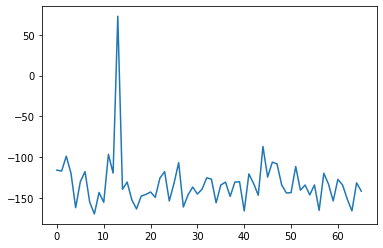

In [15]:
# ploting  log-vraisemblance x position initialle
plt.plot(LLH_List)